## Part1

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
from sklearn.datasets import load_wine
data = load_wine()

In [3]:
knn_data = data['data']
knn_targets = data['target']

knn_data_train, knn_data_test, knn_targets_train, knn_targets_test = train_test_split(knn_data,knn_targets, test_size=0.2, random_state=42)


In [4]:
dist = np.sqrt(np.sum((knn_data_train[0,:]-knn_data_train[1,:])**2))

In [5]:
def calculate_distance(v1,v2):
    dist = np.sqrt(np.sum((v1-v2)**2))
    return dist

def find_neighbors(arr1,arr1_targs,test,k):
    [n1,l1] = arr1.shape
    dists = np.zeros(n1)
    for i in range(n1):
        dists[i] = calculate_distance(arr1[i,:],test)
    arg_dists = np.argsort(dists)
    nearest_neighbors_idx = arg_dists[:k]
    nearest_neighbors = arr1_targs[nearest_neighbors_idx]
    return nearest_neighbors

def cal_prob(v,test,sehat):
    count = 0
    ar = np.array(v == test).astype(int)
    prob = np.sum(ar)/len(ar)
    return prob

def find_majority(v):
    x = np.bincount(v)
    l = np.argmax(x)
    return l


def conf_matrix(pred,y): 
    matrix=np.zeros((3,3)) 
    for i in range(len(pred)): 
        if int(pred[i])==0 and int(y[i])==0: 
            matrix[0,0]+=1 
        elif int(pred[i])==1 and int(y[i])==0:
            matrix[0,1]+=1 
        elif int(pred[i])==2 and int(y[i])==0:
            matrix[0,2]+=1 
        elif int(pred[i])==0 and int(y[i])==1:
            matrix[1,0]+=1
        elif int(pred[i])==1 and int(y[i])==1:
            matrix[1,1]+=1
        elif int(pred[i])==2 and int(y[i])==1:
            matrix[1,2]+=1
        elif int(pred[i])==0 and int(y[i])==2:
            matrix[2,0]+=1
        elif int(pred[i])==1 and int(y[i])==2:
            matrix[2,1]+=1
        elif int(pred[i])==2 and int(y[i])==2:
            matrix[2,2]+=1
    return matrix

def accuracy(y,pred):
    acc = np.sum(np.equal(y, pred)) / len(y)
    return acc

In [6]:
preds = np.zeros(len(knn_targets_test))

correct_probs = []
incorrect_probs = []

for i in range(len(knn_targets_test)):
    preds[i] = (find_majority(find_neighbors(knn_data_train,knn_targets_train,knn_data_test[i,:],10)))
    if(preds[i]==knn_targets_test[i]):
        correct_probs = np.append(correct_probs,cal_prob(find_neighbors(knn_data_train,knn_targets_train,knn_data_test[i,:],10),preds[i],preds[i]==knn_targets_test[i]))
    else:
        incorrect_probs = np.append(incorrect_probs,1 - cal_prob(find_neighbors(knn_data_train,knn_targets_train,knn_data_test[i,:],10),preds[i],preds[i]==knn_targets_test[i]))



In [7]:
print("The accuracy score for k=20 is: ",accuracy(knn_targets_test,preds))

The accuracy score for k=20 is:  0.7222222222222222


In [8]:
print("The confusion matrix for k=20 is:")
conf_matrix(preds,knn_targets_test)

The confusion matrix for k=20 is:


array([[14.,  0.,  0.],
       [ 0.,  9.,  5.],
       [ 3.,  2.,  3.]])

## Part2

In [9]:
u_c = np.unique(correct_probs)
u_f = np.unique(incorrect_probs)
U = np.unique(np.append(u_f,u_c))

counts_true = np.zeros(len(U))
counts_false = np.zeros(len(U))

count = 0
c = 0
for i in u_f:
    for j in incorrect_probs:
        if(i == j):
            count += 1
    counts_false[c] = count
    c = c + 1
    count = 0

count = 0
c = 0

for i in U:
    for j in correct_probs:
        if(i == j):
            count += 1
    counts_true[c] = count
    c = c + 1
    count = 0





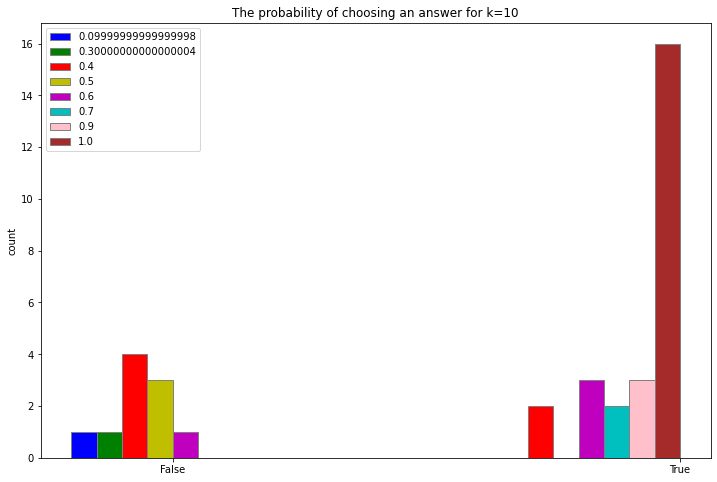

In [10]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
true = counts_true
false = counts_false


# Set position of bar on X axis

br1 = np.linspace(0,barWidth*(len(true)-1),len(true))
colors = ['b','g','r','y','m','c','pink','brown','purple','grey','black','cyan','orange','olive'] 

# Make the plot
for i in range(len(U)):
    plt.bar(br1[i] + 4 , true[i], color =colors[i], width = barWidth,edgecolor ='grey',label = U[i])

    plt.bar(br1[i]  , false[i] , color =colors[i], width = barWidth,edgecolor ='grey')

plt.xticks([0.875,5.875],['False','True'])  
plt.legend()
plt.title("The probability of choosing an answer for k=10")
plt.ylabel("count")
plt.show()

## Part3

### Metric Learning

In [11]:
from sklearn.manifold import TSNE

import metric_learn
import numpy as np
from sklearn.datasets import make_classification, make_regression

# visualisation imports
import matplotlib.pyplot as plt
np.random.seed(42)

In [48]:
def plot_tsne(X, y, colormap=plt.cm.Paired):
    plt.figure(figsize=(8, 6))

    # clean the figure
    plt.clf()

    tsne = TSNE()
    X_embedded = tsne.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=colormap)

    plt.xticks(())
    plt.yticks(())
    plt.title(("Transformed with LFDA (15 NN)"))
    plt.xlabel(("first-dim"))
    plt.ylabel(("second-dim"))

    plt.show()

c:\Anaconda\files\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Anaconda\files\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


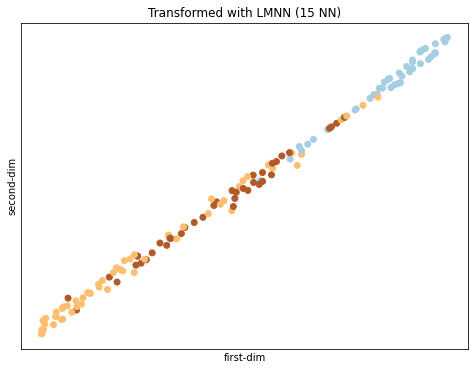

In [38]:
plot_tsne(knn_data_train, knn_targets_train)

In [65]:
# setting up LMNN
lmnn = metric_learn.LMNN(k=15, learn_rate=1e-6)

# fit the data!
lmnn.fit(knn_data_train,knn_targets_train)

LMNN(k=15, learn_rate=1e-06)

In [73]:
X_lmnn = lmnn.transform(knn_data_train)
test_lmnn = lmnn.transform(knn_data_test)


c:\Anaconda\files\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Anaconda\files\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


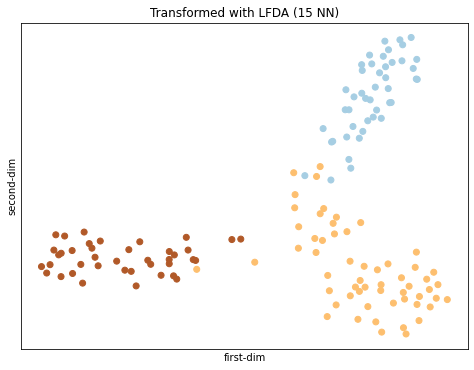

In [67]:
plot_tsne(X_lmnn, knn_targets_train)

In [68]:
# setting up LFDA
lfda = metric_learn.LFDA(k=15, n_components=13)

# fit the data!
lfda.fit(knn_data_train,knn_targets_train)

c:\Anaconda\files\lib\site-packages\metric_learn\lfda.py:109: UserWarning: Chosen k (15) too large, using 12 instead.
  warnings.warn('Chosen k (%d) too large, using %d instead.'
c:\Anaconda\files\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


LFDA(k=15, n_components=13)

c:\Anaconda\files\lib\site-packages\metric_learn\lfda.py:109: UserWarning: Chosen k (15) too large, using 12 instead.
  warnings.warn('Chosen k (%d) too large, using %d instead.'
c:\Anaconda\files\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
c:\Anaconda\files\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Anaconda\files\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


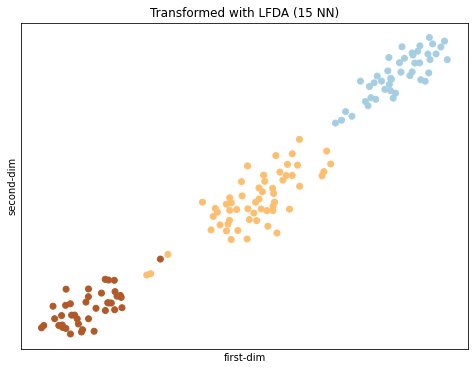

In [75]:
X_lfda = lfda.fit_transform(knn_data_train,knn_targets_train)

#X_lfda = lfda.transform(knn_data_train)
test_lfda = lfda.transform(knn_data_test)

plot_tsne(X_lfda,knn_targets_train)


### part 3

In [79]:
preds = np.zeros(len(knn_targets_test))

for i in range(len(knn_targets_test)):
    preds[i] = (find_majority(find_neighbors(X_lmnn,knn_targets_train,test_lmnn[i,:],15)))


print("The accuracy score for k=15 in lmnn is: ",accuracy(knn_targets_test,preds))

print("The confusion matrix for k=15 in lmnn is: \n",conf_matrix(preds,knn_targets_test))


The accuracy score for k=15 in lmnn is:  1.0
The confusion matrix for k=15 in lmnn is: 
 [[14.  0.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  8.]]


In [80]:
preds = np.zeros(len(knn_targets_test))

for i in range(len(knn_targets_test)):
    preds[i] = (find_majority(find_neighbors(X_lfda,knn_targets_train,test_lfda[i,:],15)))


print("The accuracy score for k=15 in lfda is: ",accuracy(knn_targets_test,preds))

print("The confusion matrix for k=15 in lfda is: \n",conf_matrix(preds,knn_targets_test))

The accuracy score for k=15 in lfda is:  1.0
The confusion matrix for k=15 in lfda is: 
 [[14.  0.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  8.]]


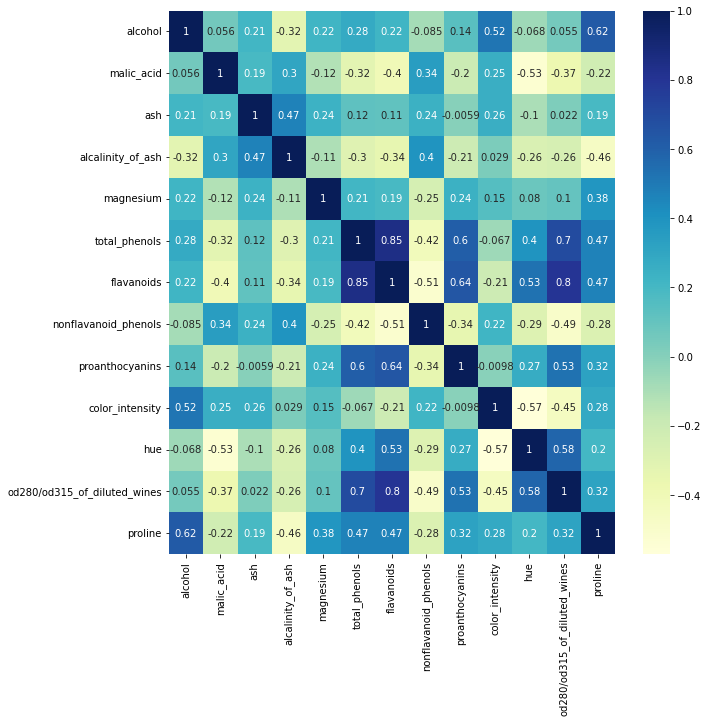

In [100]:
df = pd.DataFrame(knn_data_train, columns = data.feature_names)
plt.figure(figsize=(10,10))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()


In [98]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']